## **Multi Index Series And DataFrame**

In [2]:
# Required Libraries 

import numpy as np 
import pandas as pd

##### **Why Series is 1D object and DataFrames are 2D Objects**

**Lets try to make a multi index series**

In [3]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('ai',2022),('ai',2023),('ai',2024)]

In [4]:
# Trying to make multi index series

a = pd.Series([12,23,21,32,43,56],index=index_val)
a

(cse, 2019)    12
(cse, 2020)    23
(cse, 2021)    21
(ai, 2022)     32
(ai, 2023)     43
(ai, 2024)     56
dtype: int64

In [5]:
a[('cse',2019)]  # But this tupled together (they are not independent)

np.int64(12)

### **Multi Index Series**

**So the actual way to create multi-index series**

In [6]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('ai',2022),('ai',2023),('ai',2024)]

# One way  ---> Using from_tuples()

multi_index = pd.MultiIndex.from_tuples(index_val)
multi_index

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ( 'ai', 2022),
            ( 'ai', 2023),
            ( 'ai', 2024)],
           )

In [7]:
multi_index.levels

FrozenList([['ai', 'cse'], [2019, 2020, 2021, 2022, 2023, 2024]])

In [8]:
multi_index.levels[0]

Index(['ai', 'cse'], dtype='object')

In [9]:
# Another way  ---> Using from_product()

multi_index = pd.MultiIndex.from_product([['cse','ai'],[2019,2020,2021,2022]])

In [10]:
# Creating a series with multi index object 

s = pd.Series([1,2,3,4,5,6,7,8],index=multi_index)

In [11]:
# Fetching the items

s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [12]:
print(s.loc['ai',2020])

6


In [13]:
s.unstack()  # Converts the multi index series into DataFrame

,2019,2020,2021,2022
ai,5,6,7,8
cse,1,2,3,4


In [14]:
temp = s.unstack()
temp.stack()      # It convert the DataFrame into Multi index series

ai   2019    5
     2020    6
     2021    7
     2022    8
cse  2019    1
     2020    2
     2021    3
     2022    4
dtype: int64

### **Multi Index DataFrame**

In [15]:
multi_index

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ( 'ai', 2019),
            ( 'ai', 2020),
            ( 'ai', 2021),
            ( 'ai', 2022)],
           )

In [16]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multi_index,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ai  2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [17]:
branch_df1.loc['ai']

,avg_package,students
2019,9,10
2020,11,12
2021,13,14
2022,15,16


In [18]:
branch_df1['avg_package'].loc['ai']

2019     9
2020    11
2021    13
2022    15
Name: avg_package, dtype: int64

In [19]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [20]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [21]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [22]:
branch_df2['delhi'].loc[2019]

avg_package    1
students       2
Name: 2019, dtype: int64

In [23]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multi_index,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [24]:
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ai  2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

### **Stacking and Unstacking**

In [25]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ai  2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [26]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
ai            9   11   13   15       10   12   14   16
cse           1    3    5    7        2    4    6    8

In [27]:
branch_df1.unstack().unstack()

avg_package  2019  ai      9
                   cse     1
             2020  ai     11
                   cse     3
             2021  ai     13
                   cse     5
             2022  ai     15
                   cse     7
students     2019  ai     10
                   cse     2
             2020  ai     12
                   cse     4
             2021  ai     14
                   cse     6
             2022  ai     16
                   cse     8
dtype: int64

In [28]:
branch_df1.unstack().stack(future_stack=True)

avg_package  students
ai  2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8

In [29]:
branch_df1.unstack().stack(future_stack=True).stack()

ai   2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
dtype: int64

In [30]:
branch_df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
ai            9   11   13   15       10   12   14   16           0    0    0   
cse           1    3    5    7        2    4    6    8           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
ai     0        0    0    0    0  
cse    0        0    0    0    0

In [31]:
branch_df3.unstack().unstack()

delhi   avg_package  2019  ai      9
                           cse     1
                     2020  ai     11
                           cse     3
                     2021  ai     13
                           cse     5
                     2022  ai     15
                           cse     7
        students     2019  ai     10
                           cse     2
                     2020  ai     12
                           cse     4
                     2021  ai     14
                           cse     6
                     2022  ai     16
                           cse     8
mumbai  avg_package  2019  ai      0
                           cse     0
                     2020  ai      0
                           cse     0
                     2021  ai      0
                           cse     0
                     2022  ai      0
                           cse     0
        students     2019  ai      0
                           cse     0
                     2020  ai      0
 

### **Working with Multi index DataFrame**

In [32]:
# Head 
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ai  2019           9       10           0        0

In [33]:
# Tail
branch_df3.tail()

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [34]:
# Shape
branch_df3.shape

(8, 4)

In [35]:
# Info
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2019)) to ('ai', np.int64(2022))
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [36]:
# isnull()
branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ai  2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

### **Extracting rows and columns** 

In [37]:
branch_df3 = branch_df3.sort_index()
branch_df3

delhi               mumbai         
         avg_package students avg_package students
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [38]:
# Single row 
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [39]:
# Multiple row 
branch_df3.loc[('cse',2019)::2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0

**Using iloc**

In [40]:
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
ai  2019           9       10           0        0
    2021          13       14           0        0
cse 2019           1        2           0        0

In [41]:
# Extracting column
branch_df3['delhi']['avg_package']

ai   2019     9
     2020    11
     2021    13
     2022    15
cse  2019     1
     2020     3
     2021     5
     2022     7
Name: avg_package, dtype: int64

In [42]:
# Extracting multiple column

branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
ai  2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0

In [43]:
# Extracting Both 
branch_df3

delhi               mumbai         
         avg_package students avg_package students
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [44]:
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
ai,2019,10,0
cse,2019,2,0


**Sorting the index**

In [45]:
branch_df3.sort_index()

delhi               mumbai         
         avg_package students avg_package students
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [46]:
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
ai  2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

In [47]:
branch_df3.sort_index(ascending=[False,True])

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [48]:
branch_df3.sort_index(level=0,ascending=False)

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
ai  2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

**Transpose**

In [49]:
branch_df3.transpose()

ai                 cse               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    9   11   13   15    1    3    5    7
       students      10   12   14   16    2    4    6    8
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

**Swap Level**

In [50]:
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 ai            9       10           0        0
2020 ai           11       12           0        0
2021 ai           13       14           0        0
2022 ai           15       16           0        0
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0

In [51]:
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
ai  2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

### **Long vs Wide Data**


**`Wide Format` is where we have a single row for every data point with multiple columns to hold the values of various attributes**

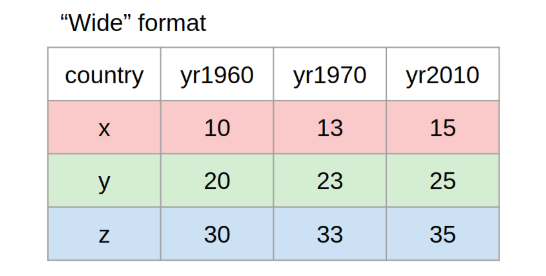

**`Long Format` is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point**

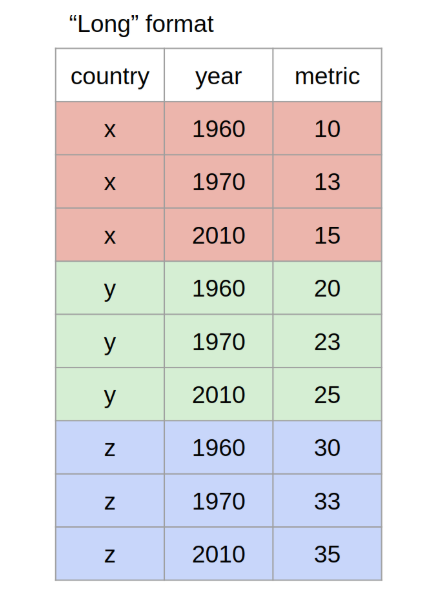

### **Melt Function**

**In pandas, the melt() function reshapes a DataFrame from wide format to long format**

**When to use :**

- Converting data to tidy format for plotting (e.g., with seaborn).

- Unpivoting data so each row represents one observation.

- Preparing data for aggregation or machine learning preprocessing

**Example**

In [52]:
# Example one 

pd.DataFrame({'cse':[120]}) # Simple DataFrame

,cse
0,120


In [53]:
pd.DataFrame({'cse':[120]}).melt() # applying melt()

,variable,value
0,cse,120


In [54]:
# Example 2

pd.DataFrame({'cse':[120],'ai':[100],'me':[50]}) # Another DataFrame

,cse,ai,me
0,120,100,50


In [55]:
# Applying the melt function

pd.DataFrame({'cse':[120],'ai':[100],'me':[50]}).melt()

,variable,value
0,cse,120
1,ai,100
2,me,50


In [56]:
# Providing names 

pd.DataFrame({'cse':[120],'ai':[100],'me':[50]}).melt(var_name='branch',value_name='num_students')

,branch,num_students
0,cse,120
1,ai,100
2,me,50


In [57]:
temp_df = pd.DataFrame({
    'branch':['cse','ai','me'],
    '2020':[150,80,50],
    '2021':[180,90,40],
    '2022':[170,120,60]
})

temp_df

,branch,2020,2021,2022
0,cse,150,180,170
1,ai,80,90,120
2,me,50,40,60


In [58]:
temp_df.melt()  # There is problem

,variable,value
0,branch,cse
1,branch,ai
2,branch,me
3,2020,150
4,2020,80
5,2020,50
6,2021,180
7,2021,90
8,2021,40
9,2022,170


In [59]:
# We need to skip branch column (changes are not applied on branch column) using the parameter
temp_df.melt(id_vars=['branch'],var_name='year',value_name='num_students')

,branch,year,num_students
0,cse,2020,150
1,ai,2020,80
2,me,2020,50
3,cse,2021,180
4,ai,2021,90
5,me,2021,40
6,cse,2022,170
7,ai,2022,120
8,me,2022,60


**Real World Example**

In [60]:
death = pd.read_csv('Datasets/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('Datasets/time_series_covid19_confirmed_global.csv')

In [61]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [62]:
death.shape

(289, 1081)

In [63]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [64]:
# We have make a data with columns ---> country , date , confirm , death

# So lets start 

death = death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name='Date',value_name='num_death')

In [65]:
death.sample(5)

,Province/State,Country/Region,Lat,Long,Date,num_death
206352,NaN,Antigua and Barbuda,17.060800,-61.796400,1/5/22,119
305911,NaN,Indonesia,-0.789300,113.921300,12/15/22,160335
241066,Alberta,Canada,53.933300,-116.576500,5/5/22,4321
214010,NaN,Iran,32.427908,53.688046,1/31/22,132454
200386,NaN,Dominican Republic,18.735700,-70.162700,12/15/21,4220


In [66]:
confirm = confirm.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],var_name='Date',value_name='num_cases')

In [67]:
confirm.sample(5)

,Province/State,Country/Region,Lat,Long,Date,num_cases
7263,NaN,Cambodia,11.5500,104.9167,2/16/20,1
6535,NaN,Malawi,-13.2543,34.3015,2/13/20,0
237198,NaN,Portugal,39.3999,-8.2245,4/21/22,3936432
262228,NaN,Denmark,56.2639,9.5018,7/17/22,3203739
155542,Beijing,China,40.1824,116.4142,7/13/21,1079


In [68]:
# Merging both

combinrd_df = confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','Date'])[['Country/Region', 'Date', 'num_cases', 'num_death']]

In [69]:
combinrd_df

,Country/Region,Date,num_cases,num_death
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### **Pivot Table**

**A pivot table in pandas is a way to summarize, group, and aggregate data in a flexible table format**

**Why use pivot tables in pandas :**

- Summarizing large datasets quickly

- Creating multi-dimensional views (by index & columns)

- Replacing complex groupby operations for tabular presentation

In [70]:
import seaborn as sns

In [71]:
tips = sns.load_dataset('tips')

In [72]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [73]:
# avg bill pay

tips.groupby('sex',observed=True)[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [74]:
tips.groupby(['sex','smoker'],observed=True)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [75]:
# Mentos Zindagi

tips.pivot_table(index='sex',columns='smoker',values='total_bill',observed=True)  # aggfunc is by default mean

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


**Aggregate Function in pivot table**

In [76]:
# Sum
tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',observed=True)

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [77]:
tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count',observed=True)

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [78]:
# Multi-dimensional
tips.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill',observed=True)

day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [79]:
# margins ---> Calculate the sum of values

tips.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True,observed=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


##### **Ploting Graphs**

In [80]:
# Loading the dataset

df = pd.read_csv('Datasets/expense_data.csv')
df.sample(5)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
269,11/24/2021 19:06,CUB - online payment,Transportation,NaN,Rapido,58.0,Expense,NaN,58.0,INR,58.0
172,12/25/2021 15:35,CUB - online payment,Food,NaN,Water,30.0,Expense,NaN,30.0,INR,30.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0
155,12/30/2021 13:36,CUB - online payment,Other,NaN,From kumara,30.0,Income,NaN,30.0,INR,30.0
143,1/3/2022 21:54,CUB - online payment,Other,NaN,From barath,201.0,Income,NaN,201.0,INR,201.0


In [81]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [84]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [87]:
df['Month'] = df['Date'].dt.month_name()

In [88]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='Month'>

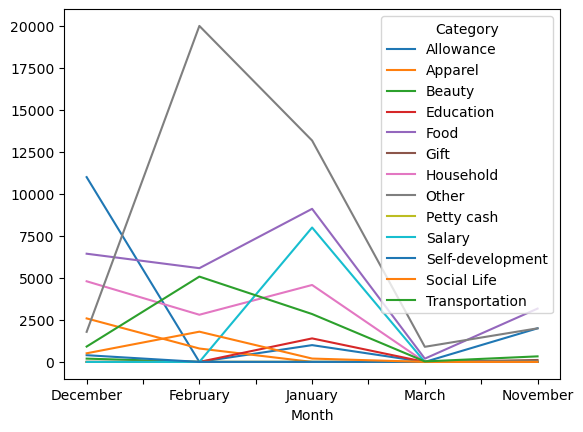

In [94]:
df.pivot_table(index='Month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='Month'>

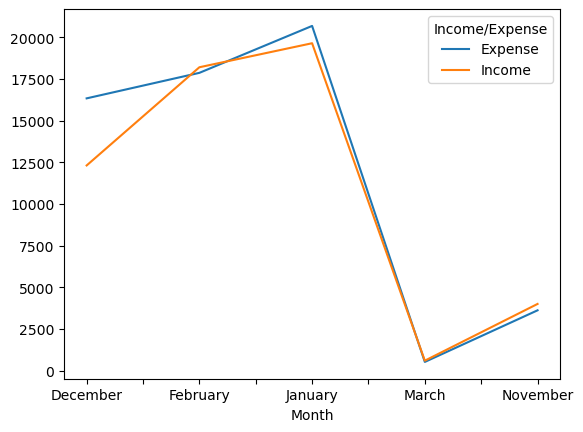

In [95]:
df.pivot_table(index='Month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='Month'>

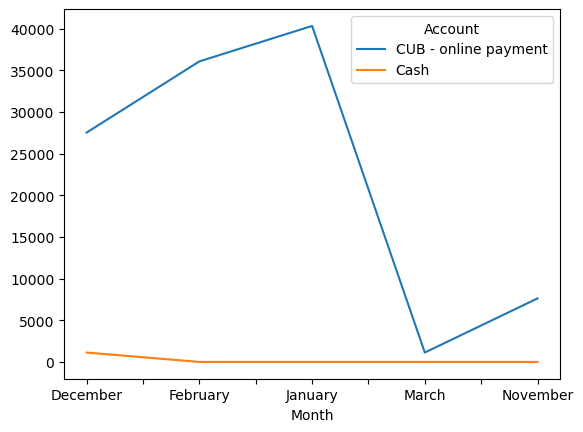

In [96]:
df.pivot_table(index='Month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()